## TIME SERIES MODEL (USING AUTO-ARIMA)

Here we will make use of the time series model, with the help of AUTO ARIMA, to analyse the given data and make predictions for the number of goals scored in the upcoming seasons by the famous Spanish Club **"FC BARCELONA"**. This model can be trained for any other club as well, depending upon the availability of the statistics.

This is meant for the submission of the **CITADEL APAC DATATHON: THE DATA OPEN 2021** organized by Citadel and Citadel Securities.

> _Made by_: Pathak Siddhant, Y1 CSC undegraduate student from NTU

--------------
### Essential Libraries

We will begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python    
> Matplotlib : Primarily for visualization  
> Pandas : Library for Data Acquisition and Preparation        
> StatsModels : Mainly for computation of time series variables   
> PyramidARIMA : For creation of the AUTO-ARIMA model by auto-tuning the hyperparameters to optimize AIC.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.api as sm

import pmdarima as pm

---------------------------

### Import the Dataset

The datasets are in CSV format; hence we use the `read_csv` function from Pandas.  

In [2]:
match = pd.read_csv('match.csv')
team = pd.read_csv('team.csv', encoding = "ISO-8859-1")
country = pd.read_csv('country.csv')
league = pd.read_csv('league.csv')
team_attributes = pd.read_csv('team_attributes.csv')
player = pd.read_csv('player.csv')
player_attributes = pd.read_csv('player_attributes.csv')

For more values, especially pertaining to years before '2008', we have procured an additional dataset named "FMEL Dataset.csv". This dataset contains information of the famous Spanish clubs from 1970-2017/18. We will be using the data from 1970-2007/08 for our research and development of Time Series Model. 

It was acquired from Kaggle and the link to the same is as follows: https://www.kaggle.com/ricardomoya/football-matches-of-spanish-league

In [3]:
la_liga=pd.read_csv('FMEL_Dataset.csv')

------------------

### Data Acquisition and Cleaning
The provided datasets (along with the additional ones) are acquired and cleaned pertaining to the needs of the exercise. The unnecessary columns have been dropped and the useful columns are combined to a cleaner and simpler Pandas DataFrame

In [4]:
match_clean = match.drop(columns =['B365H','B365D', 'B365A','BWH', 'BWD', 'BWA', 'BWA','IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA','WHD','WHA','WHH','SJH','SJD','SJA', 'VCH', 'VCD','VCA','GBH', 'GBD', 'GBA','BSH', 'BSD','BSA','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11','home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11'])

From the additional FMEL_Dataset.csv and match.csv, we have divided them into seperate seasons for better clarity with respect to each season. 

For better clarity and tidiness, we have divided the massive code into small segments, per decade for better readability from the reader's point of view.

In [5]:
#from extra dataset(additional)

#1970-80
list_70_71= la_liga.loc[la_liga['season'] == '1970-71']
list_71_72= la_liga.loc[la_liga['season'] == '1971-72']
list_72_73= la_liga.loc[la_liga['season'] == '1972-73']
list_73_74= la_liga.loc[la_liga['season'] == '1973-74']
list_74_75= la_liga.loc[la_liga['season'] == '1974-75']
list_75_76= la_liga.loc[la_liga['season'] == '1975-76']
list_76_77= la_liga.loc[la_liga['season'] == '1976-77']
list_77_78= la_liga.loc[la_liga['season'] == '1977-78']
list_78_79= la_liga.loc[la_liga['season'] == '1978-79']
list_79_80= la_liga.loc[la_liga['season'] == '1979-80']

In [6]:
#1980-90
list_80_81= la_liga.loc[la_liga['season'] == '1980-81']
list_81_82= la_liga.loc[la_liga['season'] == '1981-82']
list_82_83= la_liga.loc[la_liga['season'] == '1982-83']
list_83_84= la_liga.loc[la_liga['season'] == '1983-84']
list_84_85= la_liga.loc[la_liga['season'] == '1984-85']
list_85_86= la_liga.loc[la_liga['season'] == '1985-86']
list_86_87= la_liga.loc[la_liga['season'] == '1986-87']
list_87_88= la_liga.loc[la_liga['season'] == '1987-88']
list_88_89= la_liga.loc[la_liga['season'] == '1988-89']
list_89_90= la_liga.loc[la_liga['season'] == '1989-90']

In [7]:
#1990-00
list_90_91= la_liga.loc[la_liga['season'] == '1990-91']
list_91_92= la_liga.loc[la_liga['season'] == '1991-92']
list_92_93= la_liga.loc[la_liga['season'] == '1992-93']
list_93_94= la_liga.loc[la_liga['season'] == '1993-94']
list_94_95= la_liga.loc[la_liga['season'] == '1994-95']
list_95_96= la_liga.loc[la_liga['season'] == '1995-96']
list_96_97= la_liga.loc[la_liga['season'] == '1996-97']
list_97_98= la_liga.loc[la_liga['season'] == '1997-98']
list_98_99= la_liga.loc[la_liga['season'] == '1998-99']
list_99_00= la_liga.loc[la_liga['season'] == '1999-00']

In [8]:
#2000-07
list_00_01= la_liga.loc[la_liga['season'] == '2000-01']
list_01_02= la_liga.loc[la_liga['season'] == '2001-02']
list_02_03= la_liga.loc[la_liga['season'] == '2002-03']
list_03_04= la_liga.loc[la_liga['season'] == '2003-04']
list_04_05= la_liga.loc[la_liga['season'] == '2004-05']
list_05_06= la_liga.loc[la_liga['season'] == '2005-06']
list_06_07= la_liga.loc[la_liga['season'] == '2006-07']
list_07_08= la_liga.loc[la_liga['season'] == '2007-08']

In [9]:
#from given dataset

#2008-15
list_08_09= match_clean.loc[match_clean['season'] == '2008/2009']
list_09_10= match_clean.loc[match_clean['season'] == '2009/2010']
list_10_11= match_clean.loc[match_clean['season'] == '2010/2011']
list_11_12= match_clean.loc[match_clean['season'] == '2011/2012']
list_12_13= match_clean.loc[match_clean['season'] == '2012/2013']
list_13_14= match_clean.loc[match_clean['season'] == '2013/2014']
list_14_15= match_clean.loc[match_clean['season'] == '2014/2015']
list_15_16= match_clean.loc[match_clean['season'] == '2015/2016']

Primarily, this model will work upon the number of goals scored by the famous Spanish club **FC Barcelona** in the previous years and with that knowledge, predict the number of goals in the upcoming years with the help of the renowned ARIMA(Auto Regressive Integrated Moving Average) Model.

So, we retrieve the records of the club in discussion (FC Barcelona) from 'team.csv' to find its corresponding team_id.

In [10]:
i=team[team['team_long_name']==('FC Barcelona')]
print(i)

     team_id team_long_name team_short_name
258     8634   FC Barcelona             BAR


Therefore, the team_id for FC Barcelona is "8634". We have to look for matches consisting of this home_team_id/away_team_id in our match.csv dataframe.
The additional dataset contains the same data with the names of the team, so there we have to look for localTeam/visitorTeam only.

From the additional FMEL_Dataset.csv and match.csv, we have divided them into seperate seasons for better clarity with respect to each season. 

For better clarity and tidiness, we have divided the massive code into small segments, per decade for better readability from the reader's point of view.

In [11]:
#from additional dataset
barca_70_71_home=list_70_71.query('localTeam=="Barcelona"')
barca_70_71_away=list_70_71.query('visitorTeam=="Barcelona"')  
                                                      
barca_71_72_home=list_71_72.query('localTeam=="Barcelona"')
barca_71_72_away=list_71_72.query('visitorTeam=="Barcelona"')
barca_72_73_home=list_72_73.query('localTeam=="Barcelona"')
barca_72_73_away=list_72_73.query('visitorTeam=="Barcelona"')  
                                                      
barca_73_74_home=list_73_74.query('localTeam=="Barcelona"')
barca_73_74_away=list_73_74.query('visitorTeam=="Barcelona"')  
                                                   
barca_74_75_home=list_74_75.query('localTeam=="Barcelona"')
barca_74_75_away=list_74_75.query('visitorTeam=="Barcelona"')

barca_75_76_home=list_75_76.query('localTeam=="Barcelona"')
barca_75_76_away=list_75_76.query('visitorTeam=="Barcelona"')

barca_76_77_home=list_76_77.query('localTeam=="Barcelona"')
barca_76_77_away=list_76_77.query('visitorTeam=="Barcelona"')

barca_77_78_home=list_77_78.query('localTeam=="Barcelona"')
barca_77_78_away=list_77_78.query('visitorTeam=="Barcelona"')

barca_78_79_home=list_78_79.query('localTeam=="Barcelona"')
barca_78_79_away=list_78_79.query('visitorTeam=="Barcelona"')

barca_79_80_home=list_79_80.query('localTeam=="Barcelona"')
barca_79_80_away=list_79_80.query('visitorTeam=="Barcelona"')  

In [12]:
barca_80_81_home=list_80_81.query('localTeam=="Barcelona"')
barca_80_81_away=list_80_81.query('visitorTeam=="Barcelona"')  
                                                      
barca_81_82_home=list_81_82.query('localTeam=="Barcelona"')
barca_81_82_away=list_81_82.query('visitorTeam=="Barcelona"') 

barca_82_83_home=list_82_83.query('localTeam=="Barcelona"')
barca_82_83_away=list_82_83.query('visitorTeam=="Barcelona"')  
                                                      
barca_83_84_home=list_83_84.query('localTeam=="Barcelona"')
barca_83_84_away=list_83_84.query('visitorTeam=="Barcelona"')  
                                                   
barca_84_85_home=list_84_85.query('localTeam=="Barcelona"')
barca_84_85_away=list_84_85.query('visitorTeam=="Barcelona"')

barca_85_86_home=list_85_86.query('localTeam=="Barcelona"')
barca_85_86_away=list_85_86.query('visitorTeam=="Barcelona"')

barca_86_87_home=list_86_87.query('localTeam=="Barcelona"')
barca_86_87_away=list_86_87.query('visitorTeam=="Barcelona"')

barca_87_88_home=list_87_88.query('localTeam=="Barcelona"')
barca_87_88_away=list_87_88.query('visitorTeam=="Barcelona"')

barca_88_89_home=list_88_89.query('localTeam=="Barcelona"')
barca_88_89_away=list_88_89.query('visitorTeam=="Barcelona"')

barca_89_90_home=list_89_90.query('localTeam=="Barcelona"')
barca_89_90_away=list_89_90.query('visitorTeam=="Barcelona"')

In [13]:
barca_90_91_home=list_90_91.query('localTeam=="Barcelona"')
barca_90_91_away=list_90_91.query('visitorTeam=="Barcelona"')

barca_91_92_home=list_91_92.query('localTeam=="Barcelona"')
barca_91_92_away=list_91_92.query('visitorTeam=="Barcelona"')

barca_92_93_home=list_92_93.query('localTeam=="Barcelona"')
barca_92_93_away=list_92_93.query('visitorTeam=="Barcelona"')

barca_93_94_home=list_93_94.query('localTeam=="Barcelona"')
barca_93_94_away=list_93_94.query('visitorTeam=="Barcelona"')

barca_94_95_home=list_94_95.query('localTeam=="Barcelona"')
barca_94_95_away=list_94_95.query('visitorTeam=="Barcelona"')

barca_95_96_home=list_96_97.query('localTeam=="Barcelona"')
barca_95_96_away=list_96_97.query('visitorTeam=="Barcelona"')

barca_96_97_home=list_97_98.query('localTeam=="Barcelona"')
barca_96_97_away=list_97_98.query('visitorTeam=="Barcelona"')

barca_97_98_home=list_97_98.query('localTeam=="Barcelona"')
barca_97_98_away=list_97_98.query('visitorTeam=="Barcelona"')

barca_98_99_home=list_98_99.query('localTeam=="Barcelona"')
barca_98_99_away=list_98_99.query('visitorTeam=="Barcelona"')

barca_99_00_home=list_99_00.query('localTeam=="Barcelona"')
barca_99_00_away=list_99_00.query('visitorTeam=="Barcelona"')

In [14]:
barca_00_01_home=list_00_01.query('localTeam=="Barcelona"')
barca_00_01_away=list_00_01.query('visitorTeam=="Barcelona"')

barca_01_02_home=list_01_02.query('localTeam=="Barcelona"')
barca_01_02_away=list_01_02.query('visitorTeam=="Barcelona"')

barca_02_03_home=list_02_03.query('localTeam=="Barcelona"')
barca_02_03_away=list_02_03.query('visitorTeam=="Barcelona"')

barca_03_04_home=list_03_04.query('localTeam=="Barcelona"')
barca_03_04_away=list_03_04.query('visitorTeam=="Barcelona"')

barca_04_05_home=list_04_05.query('localTeam=="Barcelona"')
barca_04_05_away=list_04_05.query('visitorTeam=="Barcelona"')

barca_05_06_home=list_05_06.query('localTeam=="Barcelona"')
barca_05_06_away=list_05_06.query('visitorTeam=="Barcelona"')

barca_06_07_home=list_06_07.query('localTeam=="Barcelona"')
barca_06_07_away=list_06_07.query('visitorTeam=="Barcelona"')

barca_07_08_home=list_07_08.query('localTeam=="Barcelona"')
barca_07_08_away=list_07_08.query('visitorTeam=="Barcelona"')

In [15]:
#from given dataset
barca_08_09_home=list_08_09.query('home_team_id=="8634"')
barca_08_09_away=list_08_09.query('away_team_id=="8634"')

barca_09_10_home=list_09_10.query('home_team_id=="8634"')
barca_09_10_away=list_09_10.query('away_team_id=="8634"')

barca_10_11_home=list_10_11.query('home_team_id=="8634"')
barca_10_11_away=list_10_11.query('away_team_id=="8634"')

barca_11_12_home=list_11_12.query('home_team_id=="8634"')
barca_11_12_away=list_11_12.query('away_team_id=="8634"')

barca_12_13_home=list_12_13.query('home_team_id=="8634"')
barca_12_13_away=list_12_13.query('away_team_id=="8634"')

barca_13_14_home=list_13_14.query('home_team_id=="8634"')
barca_13_14_away=list_13_14.query('away_team_id=="8634"')

barca_14_15_home=list_14_15.query('home_team_id=="8634"')
barca_14_15_away=list_14_15.query('away_team_id=="8634"')

barca_15_16_home=list_15_16.query('home_team_id=="8634"')
barca_15_16_away=list_15_16.query('away_team_id=="8634"')

Now, we finally create a Pandas DataFrame which will consist of number of goals scored by the club in each season.

From the additional FMEL_Dataset.csv and match.csv, we have divided them into seperate seasons for better clarity with respect to each season. 

For better clarity and tidiness, we have divided the massive code into small segments, per decade for better readability from the reader's point of view.

In [16]:
timeseries=pd.DataFrame({"season":['1970'], "goals scored":[barca_70_71_home.localGoals.sum()+barca_70_71_away.visitorGoals.sum()]})

In [17]:
#1971-1979
timeseries=timeseries.append({"season":'1971', "goals scored":barca_71_72_home.localGoals.sum()+barca_71_72_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1972', "goals scored":barca_72_73_home.localGoals.sum()+barca_72_73_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1973', "goals scored":barca_73_74_home.localGoals.sum()+barca_73_74_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1974', "goals scored":barca_74_75_home.localGoals.sum()+barca_74_75_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1975', "goals scored":barca_75_76_home.localGoals.sum()+barca_75_76_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1976', "goals scored":barca_76_77_home.localGoals.sum()+barca_76_77_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1977', "goals scored":barca_77_78_home.localGoals.sum()+barca_77_78_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1978', "goals scored":barca_78_79_home.localGoals.sum()+barca_78_79_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1979', "goals scored":barca_79_80_home.localGoals.sum()+barca_79_80_away.visitorGoals.sum()},ignore_index=True)

In [18]:
#1980-1989
timeseries=timeseries.append({"season":'1980', "goals scored":barca_80_81_home.localGoals.sum()+barca_80_81_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1981', "goals scored":barca_81_82_home.localGoals.sum()+barca_81_82_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1982', "goals scored":barca_82_83_home.localGoals.sum()+barca_82_83_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1983', "goals scored":barca_83_84_home.localGoals.sum()+barca_83_84_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1984', "goals scored":barca_84_85_home.localGoals.sum()+barca_84_85_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1985', "goals scored":barca_85_86_home.localGoals.sum()+barca_85_86_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1986', "goals scored":barca_86_87_home.localGoals.sum()+barca_86_87_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1987', "goals scored":barca_87_88_home.localGoals.sum()+barca_87_88_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1988', "goals scored":barca_88_89_home.localGoals.sum()+barca_88_89_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1989', "goals scored":barca_89_90_home.localGoals.sum()+barca_89_90_away.visitorGoals.sum()},ignore_index=True)

In [19]:
#1990-1999
timeseries=timeseries.append({"season":'1990', "goals scored":barca_90_91_home.localGoals.sum()+barca_90_91_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1991', "goals scored":barca_91_92_home.localGoals.sum()+barca_91_92_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1992', "goals scored":barca_92_93_home.localGoals.sum()+barca_92_93_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1993', "goals scored":barca_93_94_home.localGoals.sum()+barca_93_94_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1994', "goals scored":barca_94_95_home.localGoals.sum()+barca_94_95_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1995', "goals scored":barca_95_96_home.localGoals.sum()+barca_95_96_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1996', "goals scored":barca_96_97_home.localGoals.sum()+barca_96_97_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1997', "goals scored":barca_97_98_home.localGoals.sum()+barca_97_98_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1998', "goals scored":barca_98_99_home.localGoals.sum()+barca_98_99_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'1999', "goals scored":barca_99_00_home.localGoals.sum()+barca_99_00_away.visitorGoals.sum()},ignore_index=True)

In [20]:
#2000-2006
timeseries=timeseries.append({"season":'2000', "goals scored":barca_00_01_home.localGoals.sum()+barca_00_01_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2001', "goals scored":barca_01_02_home.localGoals.sum()+barca_01_02_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2002', "goals scored":barca_02_03_home.localGoals.sum()+barca_02_03_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2003', "goals scored":barca_03_04_home.localGoals.sum()+barca_03_04_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2004', "goals scored":barca_04_05_home.localGoals.sum()+barca_04_05_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2005', "goals scored":barca_05_06_home.localGoals.sum()+barca_05_06_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2006', "goals scored":barca_06_07_home.localGoals.sum()+barca_06_07_away.visitorGoals.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2007', "goals scored":barca_07_08_home.localGoals.sum()+barca_07_08_away.visitorGoals.sum()},ignore_index=True)

In [21]:
timeseries=timeseries.append({"season":'2008', "goals scored":barca_08_09_home.home_team_goal.sum()+barca_08_09_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2009', "goals scored":barca_09_10_home.home_team_goal.sum()+barca_09_10_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2010', "goals scored":barca_10_11_home.home_team_goal.sum()+barca_10_11_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2011', "goals scored":barca_11_12_home.home_team_goal.sum()+barca_11_12_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2012', "goals scored":barca_12_13_home.home_team_goal.sum()+barca_12_13_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2013', "goals scored":barca_13_14_home.home_team_goal.sum()+barca_13_14_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2014', "goals scored":barca_14_15_home.home_team_goal.sum()+barca_14_15_away.away_team_goal.sum()},ignore_index=True)
timeseries=timeseries.append({"season":'2015', "goals scored":barca_15_16_home.home_team_goal.sum()+barca_15_16_away.away_team_goal.sum()},ignore_index=True)

In [22]:
timeseries['season'] = pd.to_datetime(timeseries['season'])
timeseries2=timeseries.set_index('season')

"timeseries" is the Pandas DataFrame which consist of the columns "season" and "goals scored". This will be needed in the later part of the code to match and append the future predicted values.

However, for the analysis of our time-series prediction model, we would require a Pandas DataFrame whose index column is the "season"(aka the date-time format), so that is why we created a duplicate of the initial DataFrame and named it as "timeseries2."

Just having a check on the DataFrame to see what we have with us now:

In [23]:
timeseries2.head()

,goals scored
season,
1970-01-01,50
1971-01-01,40
1972-01-01,41
1973-01-01,75
1974-01-01,57


Now, we are all set to work with this DataFrame as our finalised, clean dataset to train the Time Series Model.

Let's have a close look on the basic statistics about our data. For this, we used the .describe() function from the Pandas Library which provides us with basic statistical measures such as Mean, Median, Minimum, Maximum, Count etc

In [24]:
timeseries2.describe()

,goals scored
count,46.000000
mean,75.260870
std,19.597545
min,40.000000
25%,62.250000
50%,74.500000
75%,87.000000
max,115.000000


----------------
We can visualize this Pandas DataFrame using the plot() method, after the normal Matplotlib setup boilerplate:

<AxesSubplot:xlabel='season'>

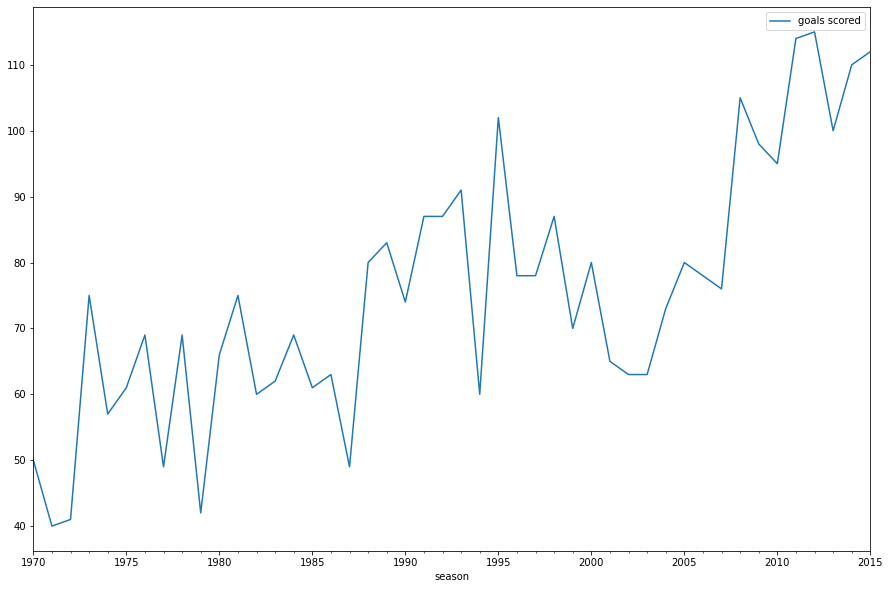

In [25]:
timeseries2.plot(figsize=(15,10))

-----
### Rolling
Rolling statistics are a type of time series-specific operation implemented by Pandas. These can be accomplished via the rolling() attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation (see Aggregation and Grouping). This rolling view makes available a number of aggregation operations by default.

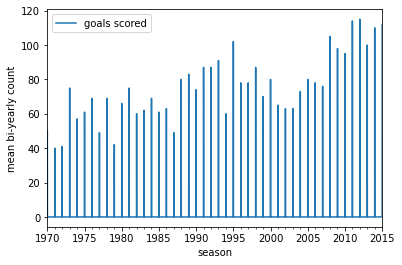

In [26]:
biyearly = timeseries2.resample('D').sum()
biyearly.rolling(2, center=True,win_type='gaussian').sum(std=19.597545).plot(style=['-'])
plt.ylabel('mean bi-yearly count');

---------
### ARIMA

An **ARIMA**, or **autoregressive integrated moving average**, is a generalization of an autoregressive moving average (ARMA) and is fitted to time-series data in an effort to forecast future points. ARIMA models can be especially efficacious in cases where data shows evidence of non-stationarity.

The “AR” part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior observed) values. The “MA” part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. The “I” (for “integrated”) indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

### How to do Auto ARIMA Forecast in Python

The **pmdarima** package provides auto_arima() with similar functionality.

**auto_arima()** uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

It requires external installation, for that you need to go to the Anaconda Prompt/any IDE prompt and use this statement:
    
                                            conda install -c saravji pmdarima

**PyramidARIMA** is a statistical library designed to fill the void in Python's time series analysis capabilities. This includes:

>The equivalent of **R's auto.arima** functionality.

>A collection of statistical tests of stationarity and seasonality.

>Time series utilities, such as differencing and inverse differencing.

>Numerous endogenous and exogenous transformers and featurizers, including Box-Cox and Fourier transformations.

>Seasonal time series decompositions.

>Cross-validation utilities.

>A rich collection of built-in time series datasets for prototyping and examples.

>Scikit-learn-esque pipelines to consolidate your estimators and promote productionization.

In [27]:
model = pm.auto_arima(timeseries2, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=362.314, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=380.316, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=366.065, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=361.887, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=378.656, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=361.092, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=363.090, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.565 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -176.546
Date:

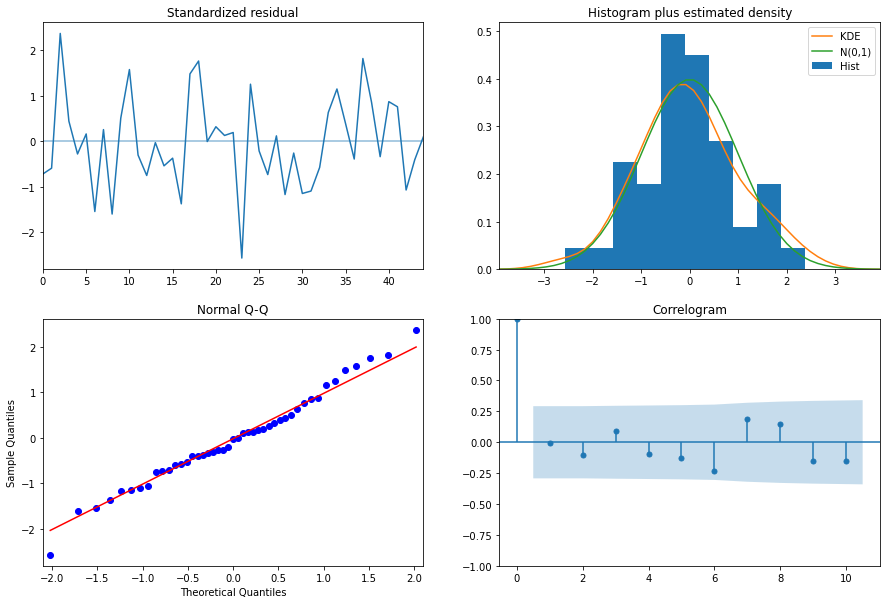

In [28]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

How to interpret the plot diagnostics?

>**Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.


>**Top Right**: The density plot suggest normal distribution with mean zero.


>**Bottom left**: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.


>**Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

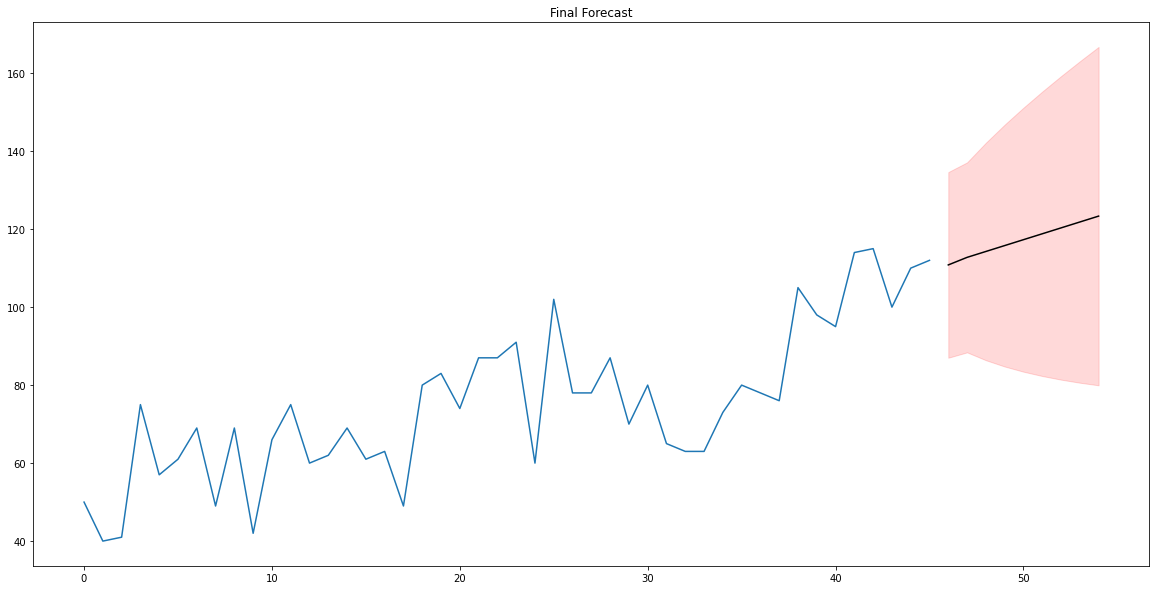

In [29]:
# Forecast
n_periods = 9
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(timeseries2.values), len(timeseries2.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(20,10))
plt.plot(timeseries2.values)
plt.plot(fc_series, color='black')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='red', alpha=.15)

plt.title("Final Forecast")
plt.show()

The horizontal axis refers to the indexed value, not the years 

In [30]:
timeseries.head()

,season,goals scored
0,1970-01-01,50
1,1971-01-01,40
2,1972-01-01,41
3,1973-01-01,75
4,1974-01-01,57


-------------

In [31]:
fc_series

46    110.824891
47    112.762469
48    114.273902
49    115.785335
50    117.296768
51    118.808201
52    120.319634
53    121.831067
54    123.342500
dtype: float64

In [32]:
type(fc_series)

pandas.core.series.Series

We observed that the predicted values, made by the model, is infact a Pandas Series. It is readable but does not make exact sense, in terms of what does "46" directly imply here?
So, for that we:
   >convert it to a Pandas DataFrame.
   
   >rename the columns to draw parallel between the "timeseries" DataFrame and this one.

In [33]:
fc = pd.DataFrame(fc_series)
fc.columns=["goals scored"]
fc.head()

,goals scored
46,110.824891
47,112.762469
48,114.273902
49,115.785335
50,117.296768


Obviously, number of goals scored in decimal values make no sense. To be on the safer side, we will use the **floor function** from the NumPy Library to convert them to exact integer values, easier to interpret.

In [34]:
fc=np.floor(fc)
fc.head()

,goals scored
46,110.0
47,112.0
48,114.0
49,115.0
50,117.0


Now, we concatenate the two DataFrames, one over the other, to exactly look and compare the values.

In [35]:
time = pd.concat([timeseries,fc])

In [36]:
time       

,season,goals scored
0,1970-01-01,50.0
1,1971-01-01,40.0
2,1972-01-01,41.0
3,1973-01-01,75.0
4,1974-01-01,57.0
5,1975-01-01,61.0
6,1976-01-01,69.0
7,1977-01-01,49.0
8,1978-01-01,69.0
9,1979-01-01,42.0


----------------
Here, in the **time** DataFrame, for example, 46 refers to the next future index value, i.e. to the season "2016".

Thus, the model tells us that in the season "2016-17", the team FC Barcelona will score 110 goals..

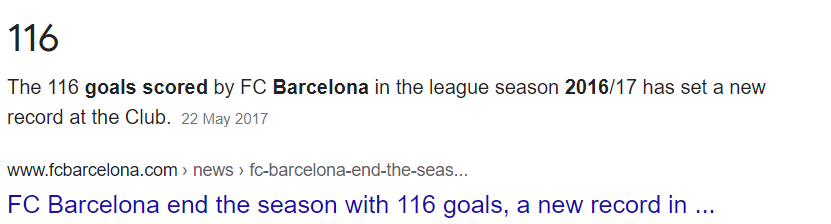

In [37]:
#Just for checking the accuracy of the model wrt Actual Statistics
from IPython.display import Image
Image(filename='stats.png')

>This prediction(by our model) is very close to the actual statistics, as per Google.

Similar procedure can be followed for other football clubs as well to work out their numbers as well.